In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob, os
import subprocess, json
import cv2
from scipy.spatial import ConvexHull
from skimage import transform

import utils
import yolo

import geometry.boundingBox as BBox
import geometry.geometry as geometry
import geometry.markovQBox as QBox

In [2]:
dataPath = "C:/GitHub/yolov7-object-tracking/runs/detect/object_tracking3/labels/"
firstFile = "C:/GitHub/yolov7-object-tracking/runs/detect/object_tracking3/labels/MAH00031_1.txt"

detectPath = "C:/GitHub/yolov7-object-tracking/runs/detect/object_tracking3/labels/MAH00031_1.txt"

framePicture = utils.openVideoFrame("C:/Users/Cewein/Documents/Videos/Videos/11012023/Plot2/MAH00031.MP4", 0)

In [3]:
data = np.loadtxt(firstFile, delimiter=" ")

for file in glob.glob(dataPath+"*.txt"):
    tmp = np.loadtxt(file, delimiter=" ")
    data = np.vstack((data,tmp))


[6.       0.       0.532031 0.197222 0.550781 0.226389 0.807031 0.309722]
[[0.550781 0.773611]
 [0.258594 0.6625  ]
 [0.796875 0.566667]
 ...
 [0.792969 0.583333]
 [0.365625 0.666667]
 [0.29375  0.725   ]]


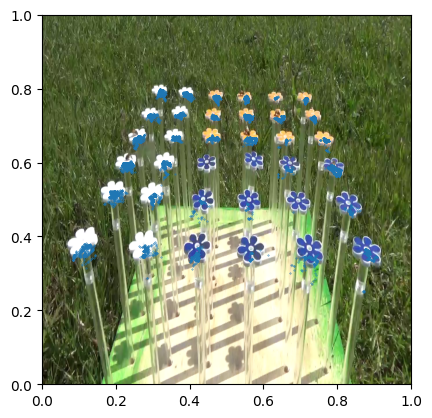

In [91]:
print(data[0])

subData = np.vstack((data[:,4],1-data[:,5])).T

print(subData)

fig, ax = plt.subplots()
ax.imshow(framePicture, extent=[0, 1, 0, 1])
ax.scatter(subData[:,0],subData[:,1],s=0.1)

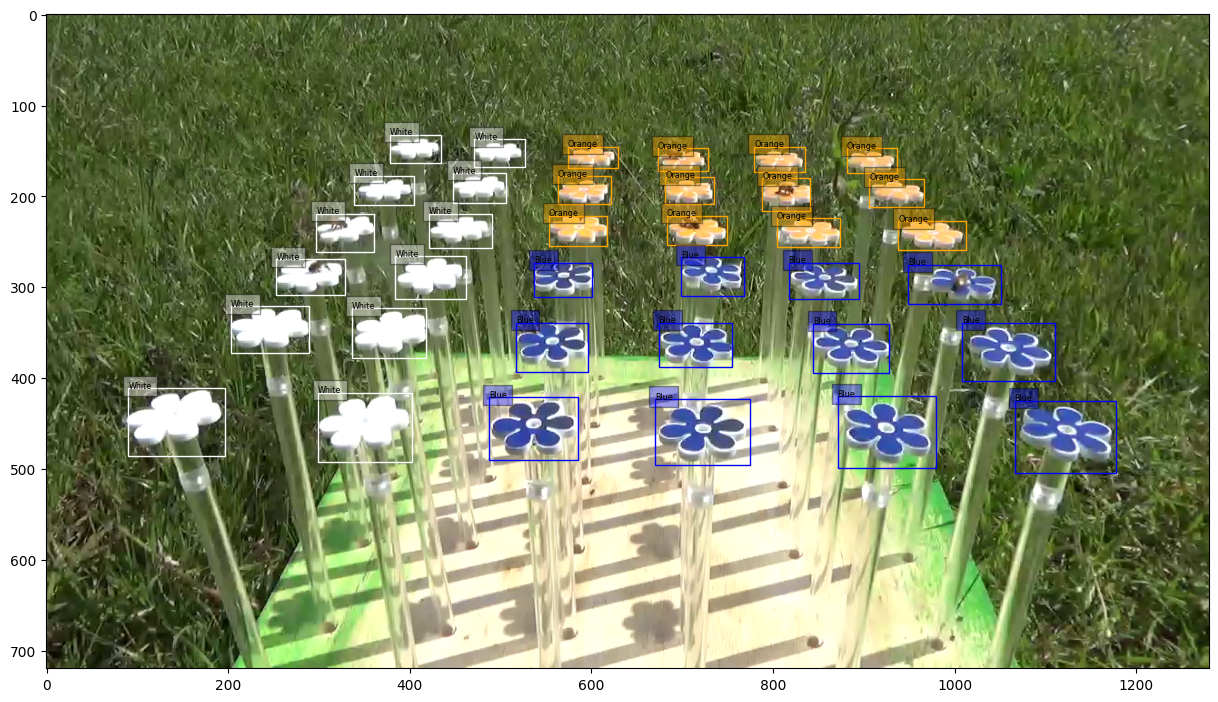

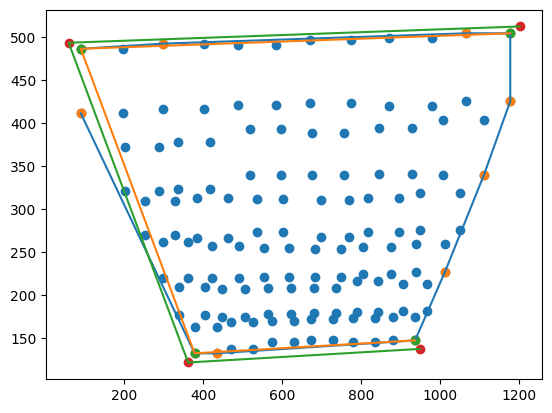

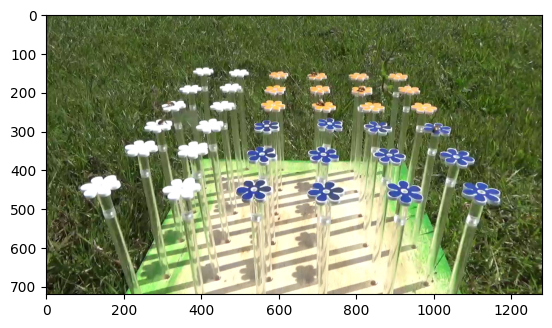

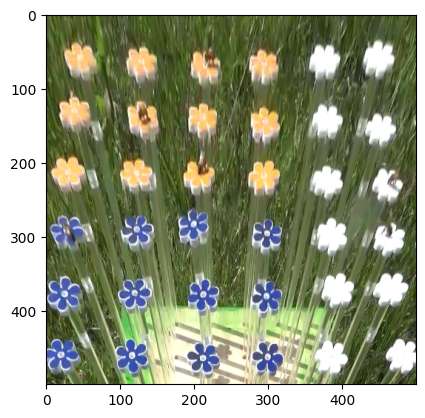

In [26]:
id, bbox = yolo.loadResult("C:\GitHub\Bee-on-Artifical-Flower\yolov7\\runs\detect\exp6\labels\\tmp.txt")

bbox = BBox.normSpaceToImgSpace(bbox, framePicture)
BBox.drawWithCategory(framePicture, bbox, id, ["Blue", "Orange", "White"], ["blue", "orange", "white"])

# Find bounding quad
all_points = BBox.toPointInImageSpace(bbox).T
hull = ConvexHull(all_points)
p = all_points[hull.vertices, :]
q = QBox.markovQuadFinder(p, 10000)
qm = QBox.boundingQuadExtender(q, p)

utils.displayBoudingQuad(all_points, p, q, qm)

# Warp image
tform3 = geometry.getPerspectiveTransform(qm)
warped = transform.warp(framePicture, tform3, output_shape=(500, 500))

plt.imshow(framePicture)
plt.show()
plt.imshow(warped)
plt.show()